In [1]:
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [2]:
install.packages("tidyverse")
install.packages("umap")
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘RcppEigen’, ‘reticulate’, ‘Rcpp’, ‘RSpectra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
system("gdown --id 1KnEx6dsM0U4ei0ST4LFz8Asjo-wZDHjH")

In [4]:
# Install and load required libraries if not already installed

library(tidyverse)
library(umap)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# Install and load the tidyverse package if not already installed
# install.packages("tidyverse")
library(tidyverse)

# Read a TSV file with tab as delimiter
data  <- read.table("data.tsv", header = TRUE, sep = "\t")

In [6]:
rownames(data) = data$X
x = t(data)
df = x[-1,]
df = subset(data, select = -c(X))
data = t(df)
head(data)

,ENSG00000000003.10,ENSG00000000419.8,ENSG00000000457.9,ENSG00000000460.12,ENSG00000000938.8,ENSG00000000971.11,ENSG00000001036.9,ENSG00000001084.6,ENSG00000001167.10,ENSG00000001460.13,⋯,ENSG00000273474.1,ENSG00000273477.1,ENSG00000273478.1,ENSG00000273485.1,ENSG00000273486.1,ENSG00000273488.1,ENSG00000273489.1,ENSG00000273492.1,SPIKE1,SPIKE2
BC01_02,0.00,50.73,3.28,0.00,0,0.00,9.64,2.87,0.77,0.82,⋯,0,0.74,0,0,0,0,5.97,0,18414.34,537.11
BC01_03,0.00,120.46,0.81,13.42,0,0.00,36.36,5.02,1.08,0.00,⋯,0,0.00,0,0,0,0,0.00,0,19603.44,653.27
BC01_04,0.00,6.97,92.23,0.34,0,0.00,0.00,108.11,0.00,0.00,⋯,0,23.78,0,0,0,0,0.00,0,28523.94,916.42
BC01_05,0.00,180.85,6.44,0.26,0,0.00,0.00,2.32,0.37,1.65,⋯,0,0.00,0,0,0,0,18.65,0,31210.57,961.37
BC01_06,0.00,32.09,59.78,0.00,0,0.33,8.42,52.59,0.00,0.00,⋯,0,14.54,0,0,0,0,0.00,0,48684.49,2052.48
BC01_08,19.38,140.00,37.75,0.00,0,0.00,31.10,57.71,0.00,0.00,⋯,0,0.00,0,0,0,0,0.00,0,26428.35,1056.75


In [8]:
# Read a TXT file with whitespace as delimiter
label_scvag  <- read.table("Chung/scVAG.txt", header = TRUE)
# Read a TXT file with whitespace as delimiter
label_scgac  <- read.table("Chung/scGAC.txt", header = TRUE)
# Read a TXT file with whitespace as delimiter
label_scgnn  <- read.csv("Chung/scGNN.txt", header = TRUE)
# Read a CSV file named "your_file.csv"
true_label <- read.csv("Chung/True_label.csv")
# Read a CSV file named "your_file.csv"
label_sc3 <- read.csv("Chung/SC3.csv")
# Read a CSV file named "your_file.csv"
label_desc <- read.csv("Chung/DESC.csv")
# Read a CSV file named "your_file.csv"
label_seurat <- read.csv("Chung/Seurat.csv")

In [9]:
rownames(label_scvag) = label_scvag$cell
label_scvag = subset(label_scvag, select = -c(cell))
head(label_scvag)

,label
,<int>
BC01_02,0
BC01_03,0
BC01_04,0
BC01_05,0
BC01_06,0
BC01_08,0


In [10]:
rownames(label_scgac) = label_scgac$cell
label_scgac = subset(label_scgac, select = -c(cell))
head(label_scgac)

,label
,<int>
BC01_02,3
BC01_03,3
BC01_04,3
BC01_05,3
BC01_06,3
BC01_08,3


In [11]:
rownames(true_label) = true_label$X
true_label = subset(true_label, select = -c(X))
head(true_label)

,index3
,<chr>
0,Tumor
1,Tumor
2,Tumor
3,Tumor
4,Tumor
5,Tumor


In [12]:
rownames(label_scgnn) = label_scgnn$X
label_scgnn = subset(label_scgnn, select = -c(X))
head(label_scgnn)

,Celltype
,<int>
BC01_02,5
BC01_03,5
BC01_04,5
BC01_05,5
BC01_06,5
BC01_08,5


In [13]:
rownames(label_desc) = label_desc$X
label_desc = subset(label_desc, select = -c(X))
head(label_desc)

,label
,<int>
0,7
1,7
2,7
3,7
4,7
5,7


In [14]:
rownames(label_seurat) = label_seurat$X
label_seurat = subset(label_seurat, select = -c(X))
head(label_seurat)

,Idents.pbmc.
,<int>
BC01_02,0
BC01_03,0
BC01_04,0
BC01_05,0
BC01_06,0
BC01_08,0


In [15]:
rownames(label_sc3) = label_sc3$X
label_sc3 = subset(label_sc3, select = -c(X))
head(label_sc3)

,label
,<int>
1,2
2,2
3,2
4,2
5,2
6,2


In [16]:
dim(label_sc3)

[1] 515   1

In [17]:
dim(label_scvag)

[1] 515   1

In [18]:
dim(label_scgac)

[1] 515   1

In [19]:
dim(label_scgnn)

[1] 515   1

In [20]:
dim(label_seurat)

[1] 515   1

In [21]:
dim(label_desc)

[1] 515   1

In [22]:
dim(true_label)

[1] 515   1

In [ ]:
# Perform t-SNE
tsne_result <- Rtsne::Rtsne(data, dims = 2, perplexity = 30, verbose = TRUE)

Performing PCA
Read the 515 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.09 seconds (sparsity = 0.237760)!
Learning embedding...
Iteration 50: error is 57.582865 (50 iterations in 0.14 seconds)
Iteration 100: error is 54.790574 (50 iterations in 0.11 seconds)
Iteration 150: error is 54.760061 (50 iterations in 0.12 seconds)
Iteration 200: error is 54.755742 (50 iterations in 0.12 seconds)
Iteration 250: error is 54.756412 (50 iterations in 0.13 seconds)
Iteration 300: error is 0.586985 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.533681 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.523984 (50 iterations in 0.10 seconds)
Iteration 450: error is 0.520415 (50 iterations in 0.10 seconds)
Iteration 500: error is 0.516768 (50 iterations in 0.10 seconds)
Iteration 550: error is 0.513656 (50 iterations in 0.10 seconds)
Iteration 600

In [ ]:
# Install and load the viridis library for color palette
# install.packages("viridis")
library(viridis)

Loading required package: viridisLite



Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Saving 6.67 x 6.67 in image


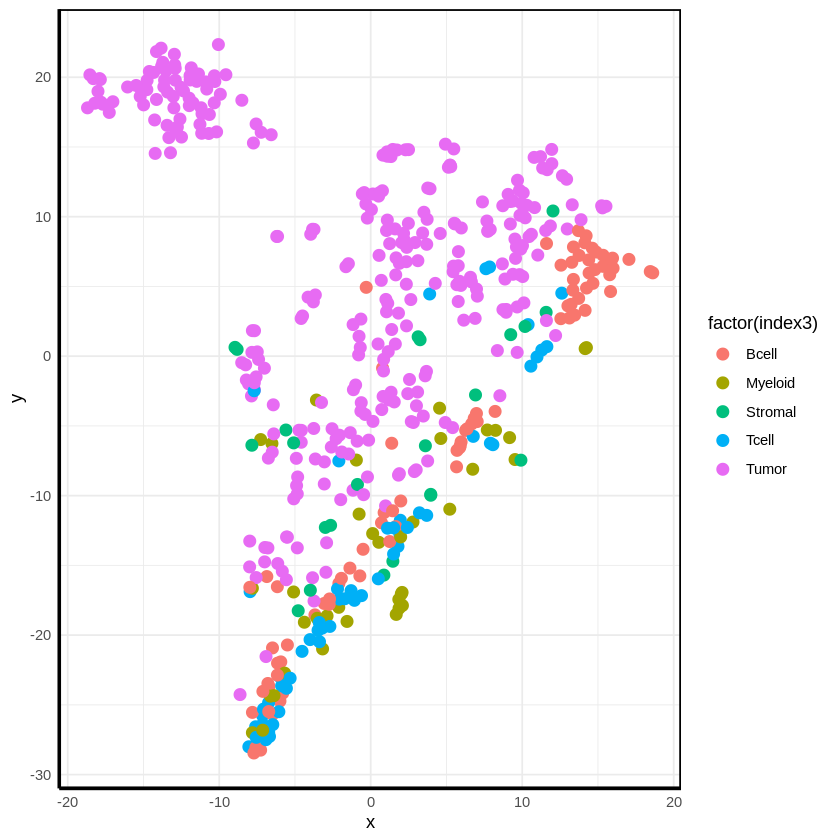

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(true_label['index3']) %>%
  ggplot(aes(x = x, y = y, color = factor(index3))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_label.svg", plot = tsne_plot, device = "svg", dpi = 500)

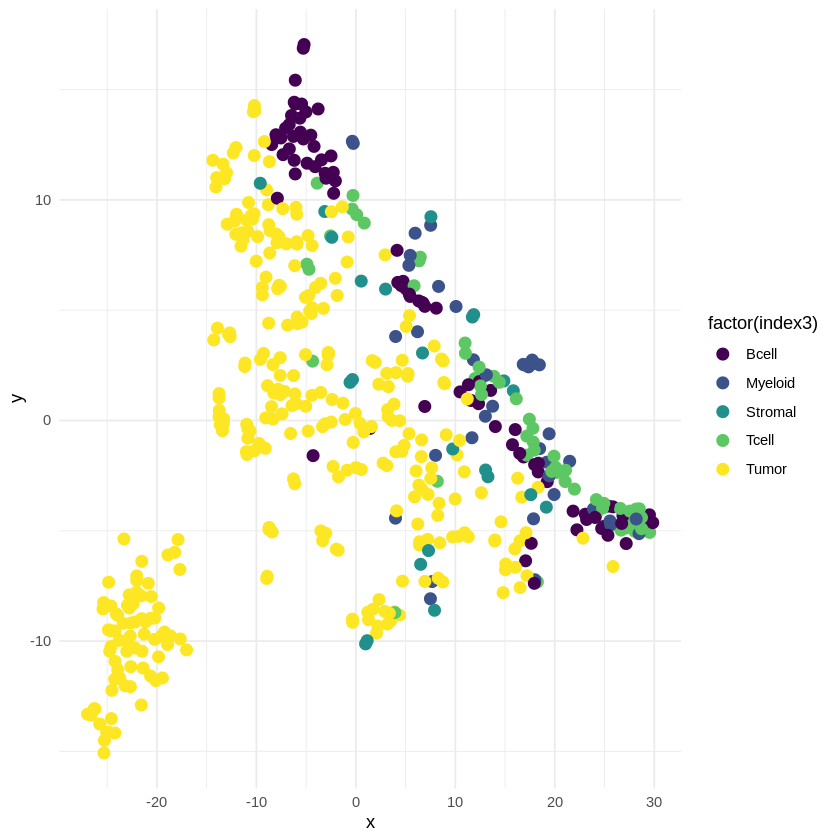

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(true_label['index3']) %>%
  ggplot(aes(x = x, y = y, color = factor(index3))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()
print(tsne_plot)

Saving 6.67 x 6.67 in image


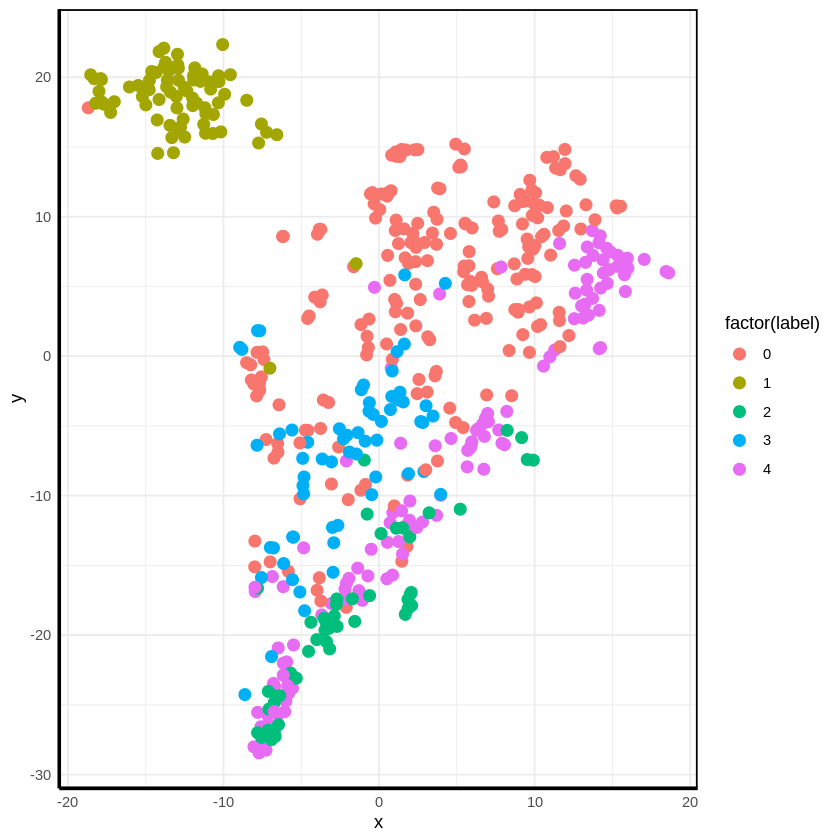

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scvag['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_scVAG.svg", plot = tsne_plot, device = "svg", dpi = 500)

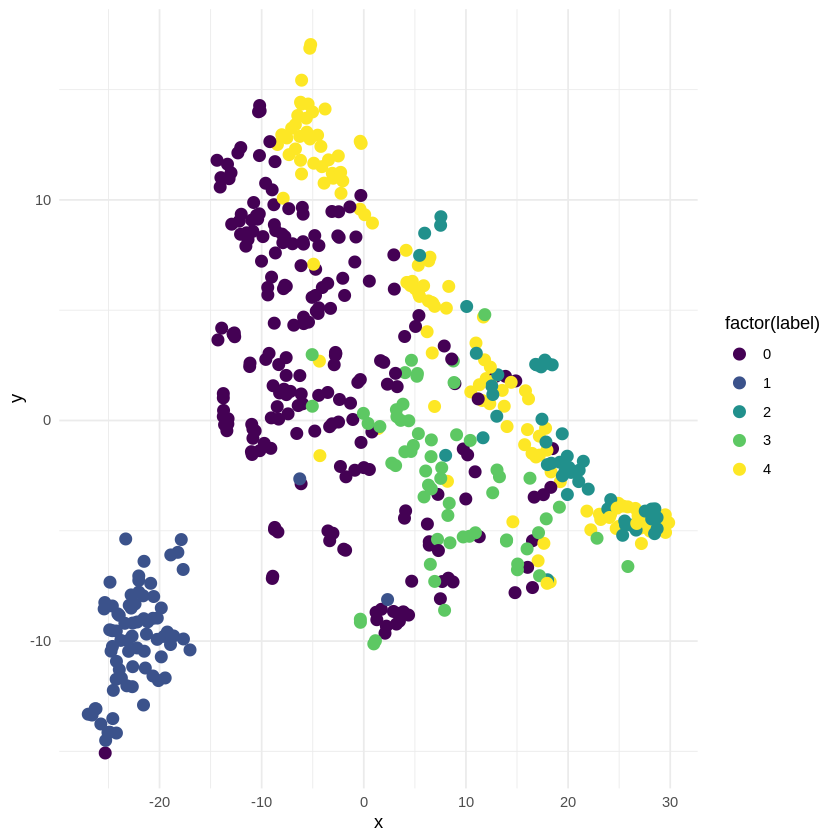

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scvag['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)

Saving 6.67 x 6.67 in image


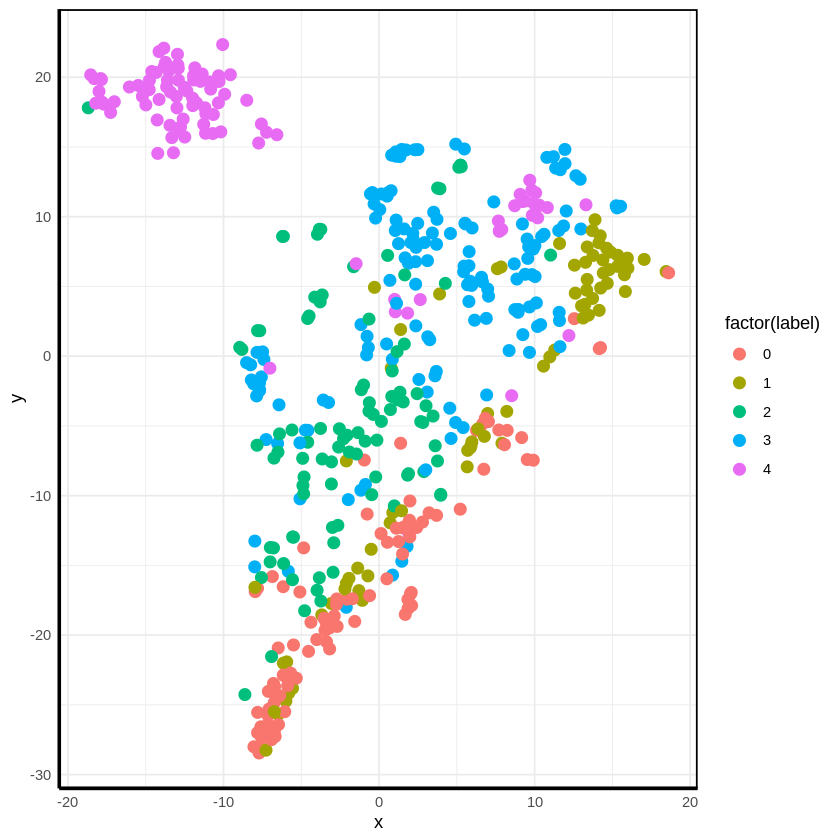

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgac['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_scGAC.svg", plot = tsne_plot, device = "svg", dpi = 500)

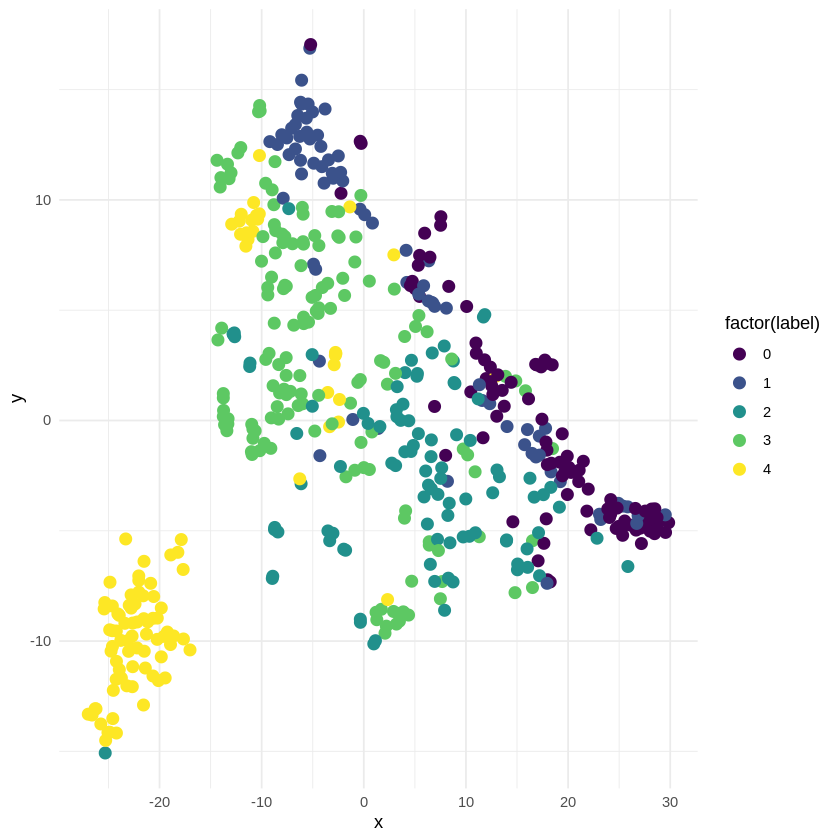

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgac['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)

Saving 6.67 x 6.67 in image


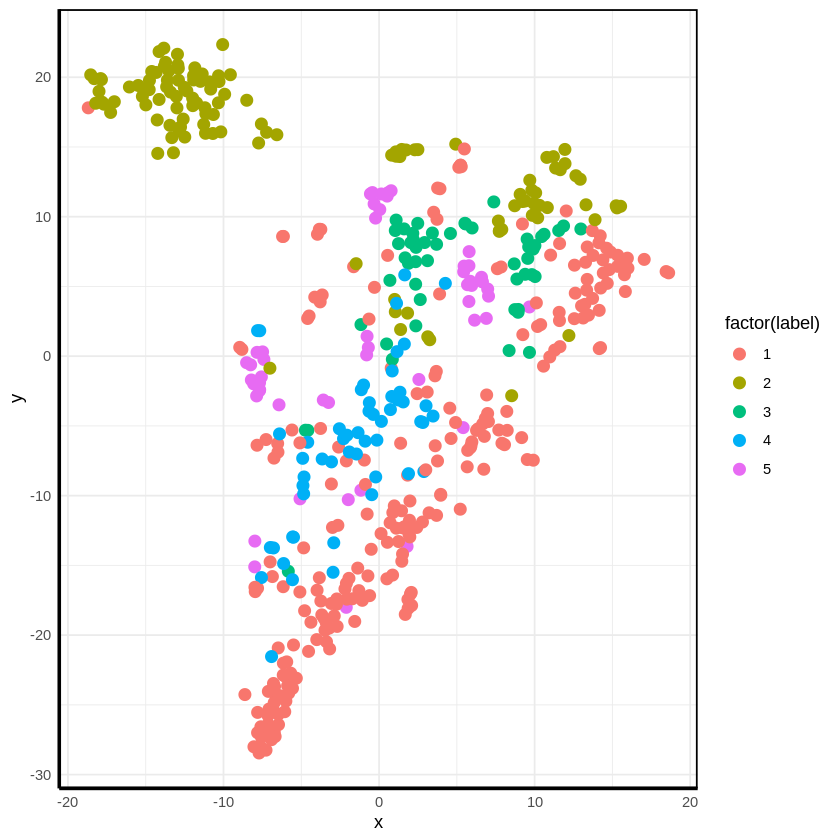

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_sc3['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_SC3.svg", plot = tsne_plot, device = "svg", dpi = 500)

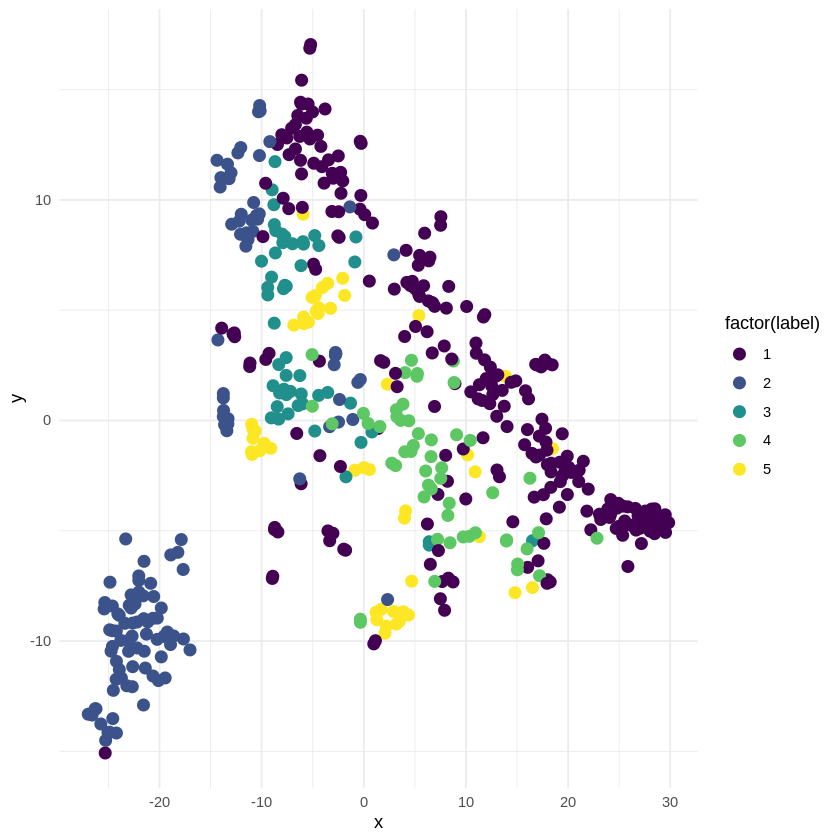

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_sc3['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)

Saving 6.67 x 6.67 in image


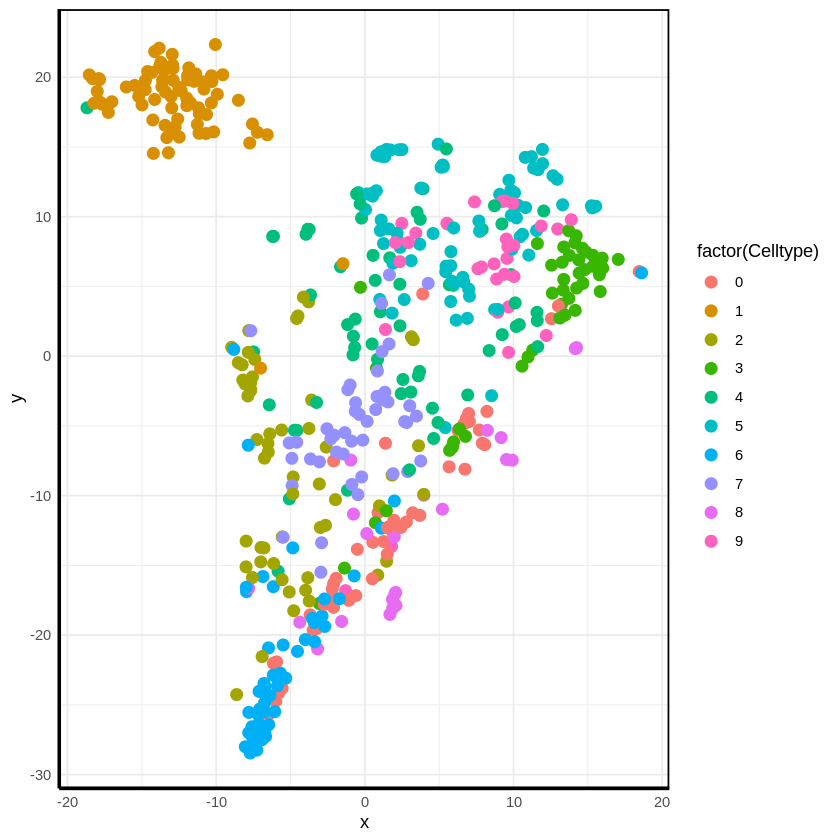

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgnn['Celltype']) %>%
  ggplot(aes(x = x, y = y, color = factor(Celltype))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_scGNN.svg", plot = tsne_plot, device = "svg", dpi = 500)

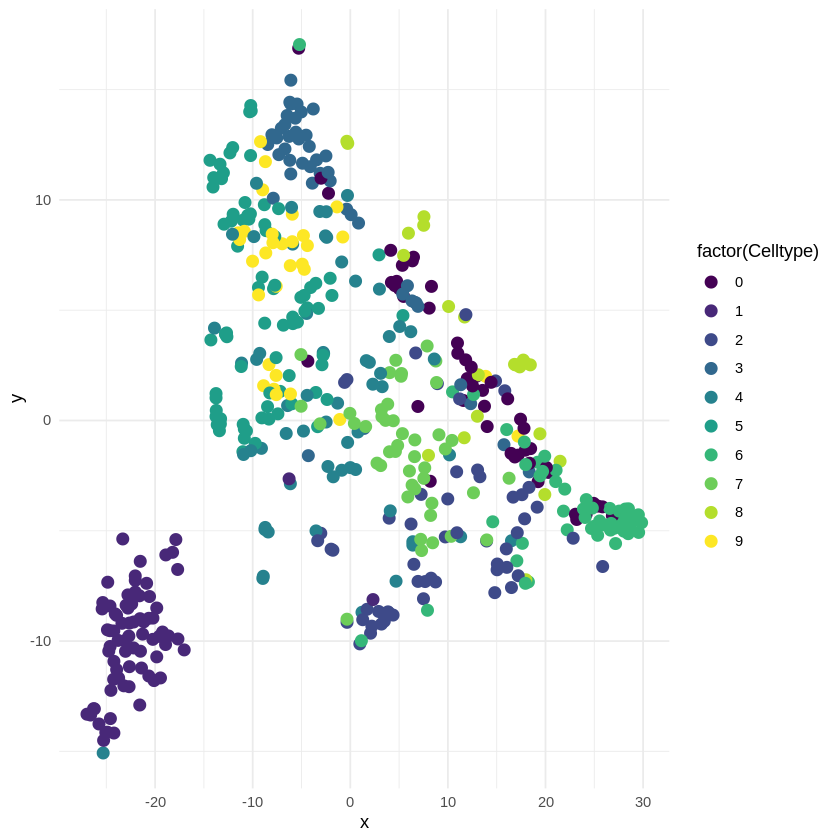

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_scgnn['Celltype']) %>%
  ggplot(aes(x = x, y = y, color = factor(Celltype))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)

Saving 6.67 x 6.67 in image


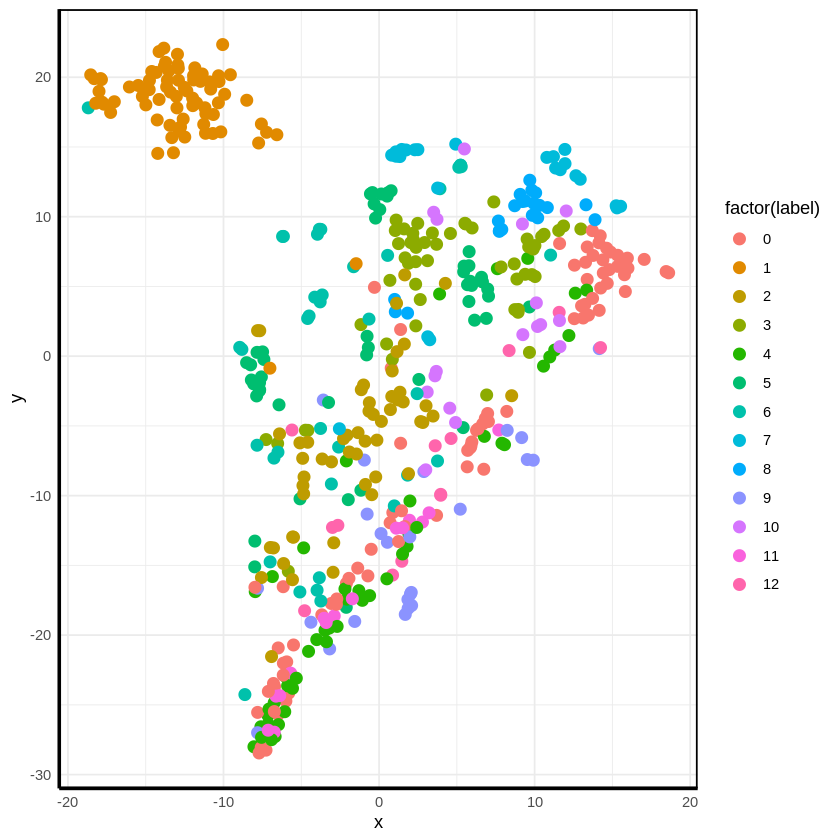

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_desc['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_DESC.svg", plot = tsne_plot, device = "svg", dpi = 500)

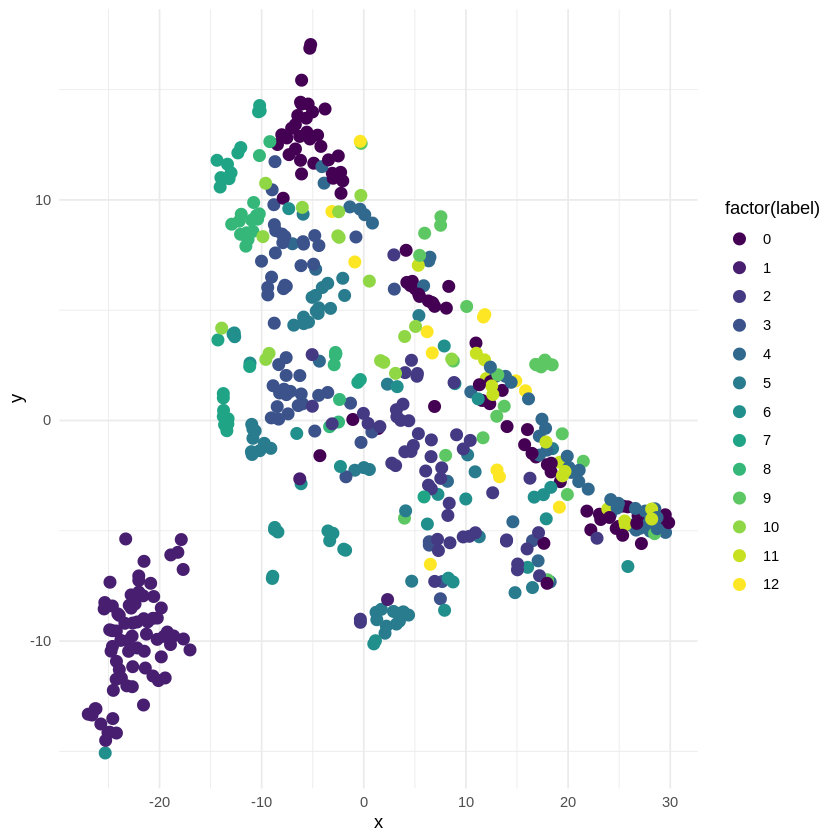

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_desc['label']) %>%
  ggplot(aes(x = x, y = y, color = factor(label))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)

Saving 6.67 x 6.67 in image


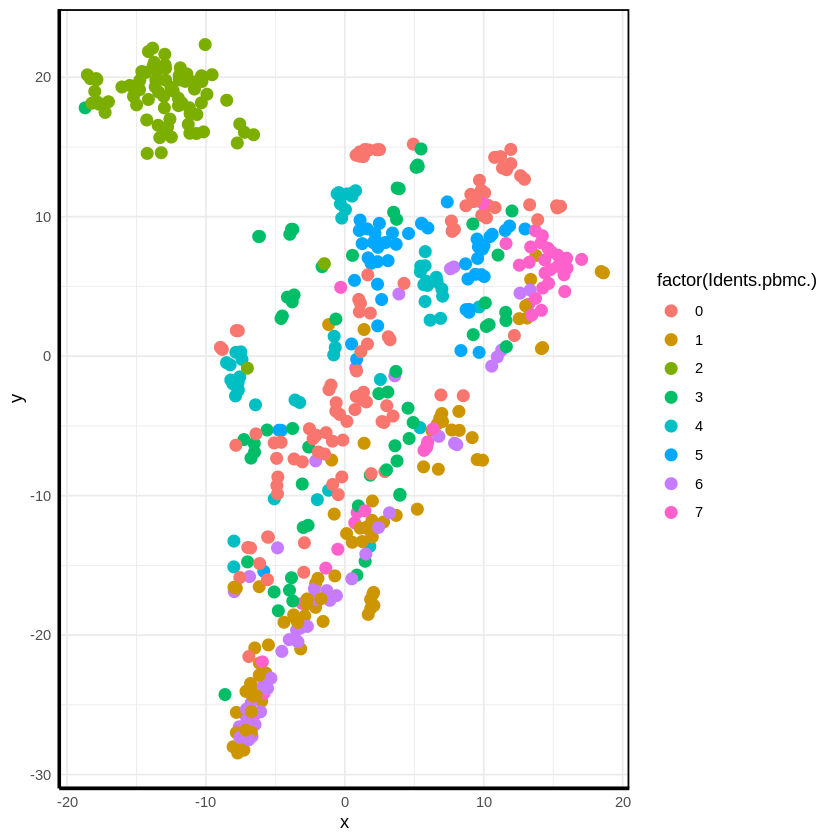

In [ ]:
library(ggplot2)

tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_seurat['Idents.pbmc.']) %>%
  ggplot(aes(x = x, y = y, color = factor(Idents.pbmc.))) +
  geom_point(size = 3, alpha = 10) +
  theme_minimal() +
  theme(
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    axis.line = element_line(color = "black", size = 1)
  )

print(tsne_plot)
ggsave(filename = "chung_Seurat.svg", plot = tsne_plot, device = "svg", dpi = 500)

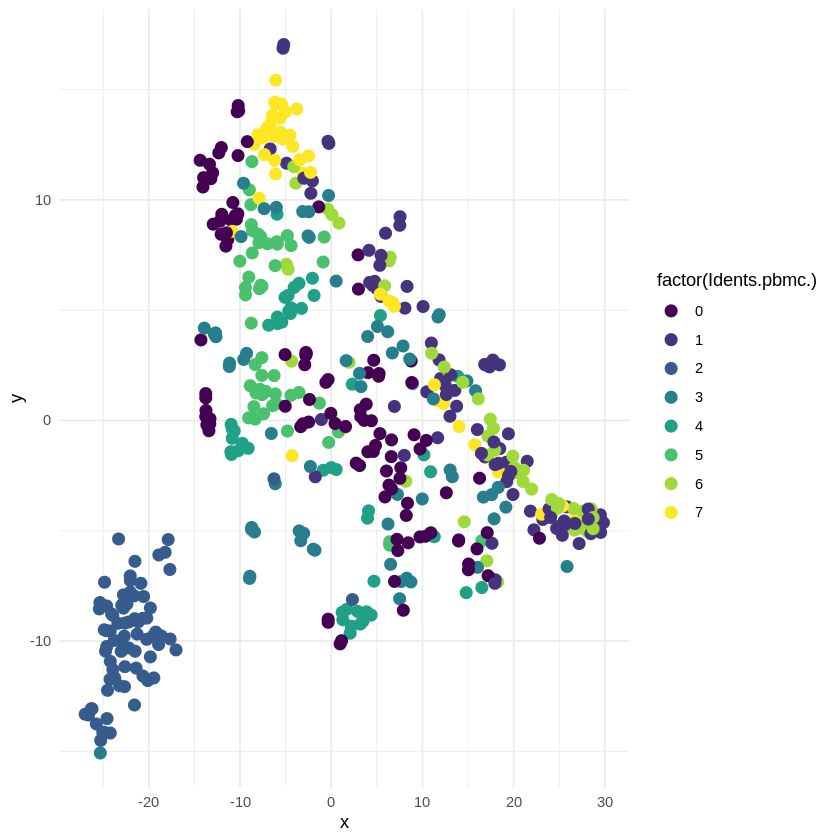

In [ ]:
# Create a t-SNE plot with labels using the viridis color palette
tsne_plot <- as.data.frame(tsne_result$Y) %>%
  rename(x = V1, y = V2) %>%
  bind_cols(label_seurat['Idents.pbmc.']) %>%
  ggplot(aes(x = x, y = y, color = factor(Idents.pbmc.))) +
  geom_point(size = 3, alpha = 100.7) +
  theme_minimal() +
  scale_color_viridis_d()

print(tsne_plot)